### Step 1: Import Libraries & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Ensure figures directory exists
os.makedirs("figures", exist_ok=True)

In [3]:
# Load enriched dataset
df = pd.read_csv("processed_spacex_data.csv")

In [4]:
df.head()

,rocket_encoded,launchpad_encoded,payload_mass,temperature,humidity,wind_speed,year,month,day,hour,success
0,0,3,0,3.02,87,2.06,2006,3,24,22,False
1,0,3,1,3.59,40,6.38,2007,3,21,1,False
2,0,3,2,-2.82,68,2.06,2008,8,3,3,False
3,0,3,3,-0.64,79,5.97,2008,9,28,23,True
4,0,3,4,6.29,62,5.97,2009,7,13,3,True


In [5]:
df.shape

(186, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rocket_encoded     186 non-null    int64  
 1   launchpad_encoded  186 non-null    int64  
 2   payload_mass       186 non-null    int64  
 3   temperature        186 non-null    float64
 4   humidity           186 non-null    int64  
 5   wind_speed         186 non-null    float64
 6   year               186 non-null    int64  
 7   month              186 non-null    int64  
 8   day                186 non-null    int64  
 9   hour               186 non-null    int64  
 10  success            186 non-null    bool   
dtypes: bool(1), float64(2), int64(8)
memory usage: 14.8 KB


In [8]:
df.describe()

,rocket_encoded,launchpad_encoded,payload_mass,temperature,humidity,wind_speed,year,month,day,hour
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,0.989247,0.817204,92.268817,25.259516,37.274194,5.829946,2018.827957,6.188172,14.919355,12.634409
std,0.207670,0.952337,53.529813,10.717058,24.296704,2.134613,3.280157,3.363086,8.784443,7.299441
min,0.000000,0.000000,0.000000,-8.580000,3.000000,0.630000,2006.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,46.250000,22.850000,17.000000,4.120000,2017.000000,3.000000,7.000000,5.250000
50%,1.000000,0.000000,92.500000,27.605000,27.500000,5.860000,2020.000000,6.000000,15.000000,14.000000
75%,1.000000,2.000000,138.750000,32.375000,57.000000,7.230000,2021.000000,9.000000,22.000000,19.000000
max,2.000000,3.000000,184.000000,39.880000,100.000000,10.580000,2022.000000,12.000000,31.000000,23.000000


In [9]:
df.columns

Index(['rocket_encoded', 'launchpad_encoded', 'payload_mass', 'temperature',
       'humidity', 'wind_speed', 'year', 'month', 'day', 'hour', 'success'],
      dtype='object')

In [11]:
df.isnull().sum()

rocket_encoded       0
launchpad_encoded    0
payload_mass         0
temperature          0
humidity             0
wind_speed           0
year                 0
month                0
day                  0
hour                 0
success              0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

### Step 2: Clean & Prepare Data

In [13]:
# Convert success to integer (if not already)
df['success'] = df['success'].astype(int)

# Extract launch site from launchpad if needed (some datasets do this)
df['launch_site'] = df['launchpad_encoded'].astype(str)

# Drop rows with missing temperature/humidity/etc. if needed
df = df.dropna(subset=['temperature', 'humidity', 'wind_speed'], how='any')

### Step 3: Explotary Data Analysis EDA

#### Target Distribution

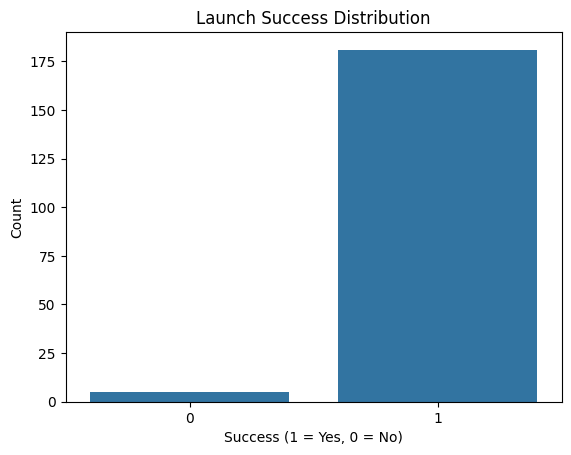

In [14]:
# Target Distribution
sns.countplot(x='success', data=df)
plt.title("Launch Success Distribution")
plt.xlabel("Success (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

#### Weather Impact on Launch Success

c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


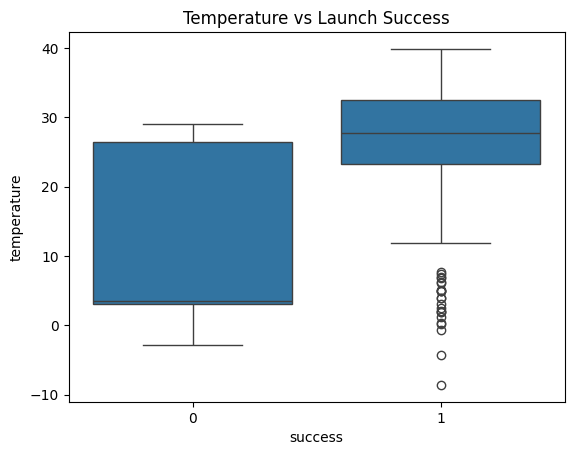

In [15]:
# Temperature
sns.boxplot(x='success', y='temperature', data=df)
plt.title("Temperature vs Launch Success")
plt.show()


c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


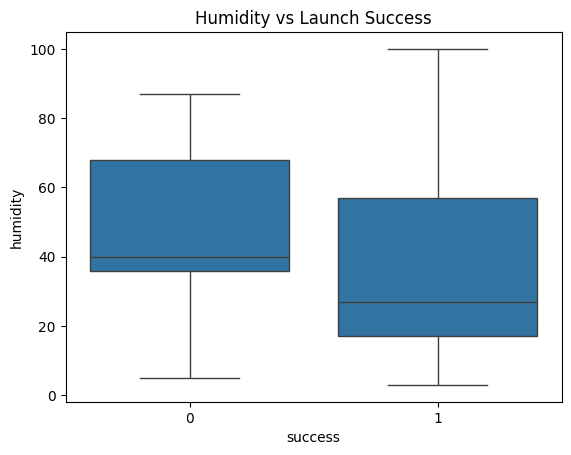

In [16]:
# Humidity
sns.boxplot(x='success', y='humidity', data=df)
plt.title("Humidity vs Launch Success")
plt.show()


c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


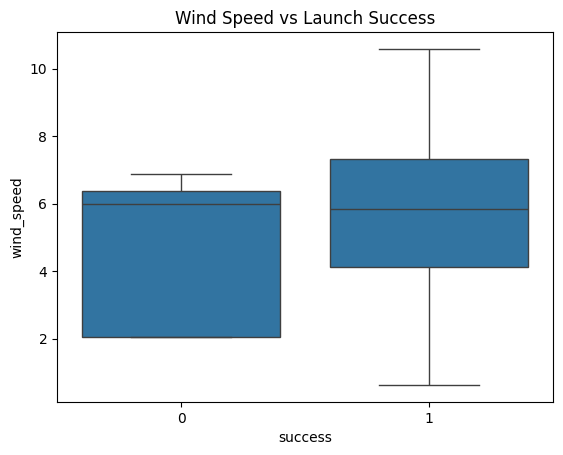

In [17]:
# Wind Speed
sns.boxplot(x='success', y='wind_speed', data=df)
plt.title("Wind Speed vs Launch Success")
plt.show()

c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


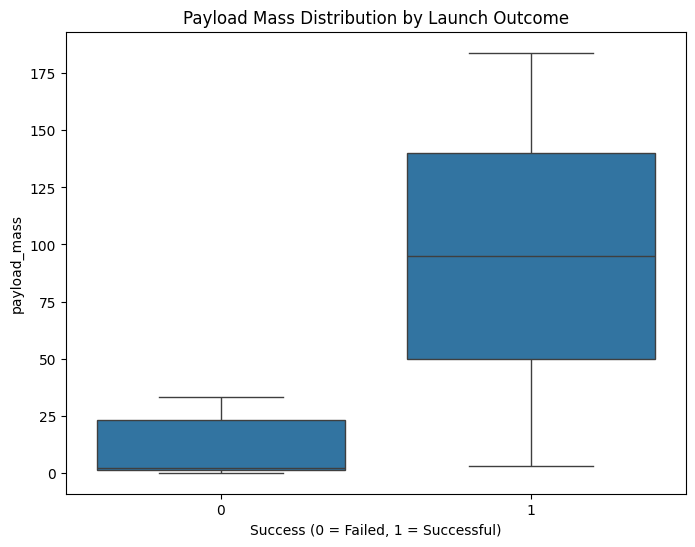

In [18]:
# Payload Mass vs. Success
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='success', y='payload_mass')
plt.xlabel("Success (0 = Failed, 1 = Successful)")
plt.title("Payload Mass Distribution by Launch Outcome")
plt.savefig("../figures/payload_vs_success.png")
plt.show()

#### Time Influence (Year, Month, Hour)

c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


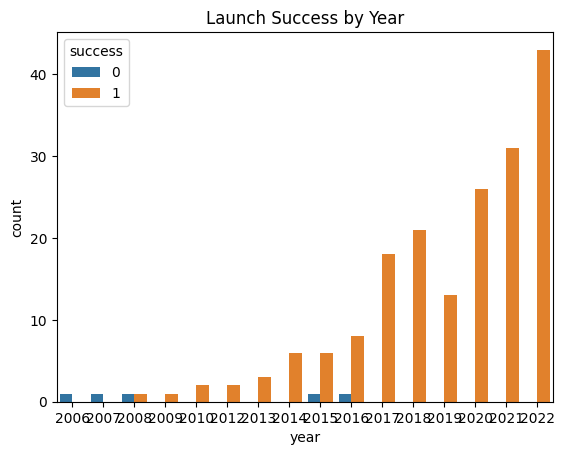

In [19]:
# Yearly Launch Trends
sns.countplot(x='year', hue='success', data=df)
plt.title("Launch Success by Year")
plt.show()


c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


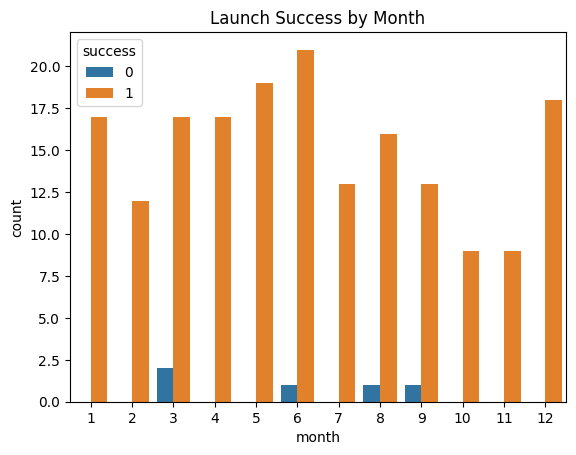

In [20]:
# Monthly Distribution
sns.countplot(x='month', hue='success', data=df)
plt.title("Launch Success by Month")
plt.show()

c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

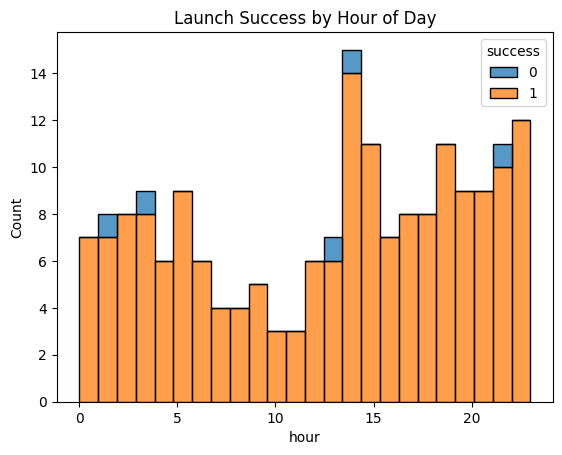

In [21]:
# Hour of Day
sns.histplot(data=df, x='hour', hue='success', bins=24, multiple='stack')
plt.title("Launch Success by Hour of Day")
plt.show()

#### Rocket and Launchpad Effect

c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


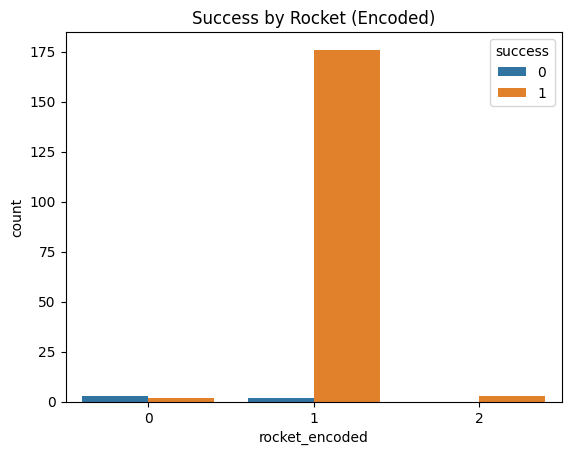

In [22]:
# Rocket Encoded
sns.countplot(x='rocket_encoded', hue='success', data=df)
plt.title("Success by Rocket (Encoded)")
plt.show()

c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


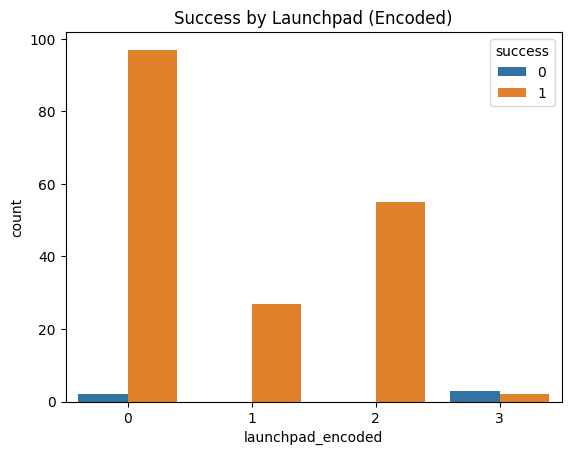

In [23]:
# Launchpad Encoded
sns.countplot(x='launchpad_encoded', hue='success', data=df)
plt.title("Success by Launchpad (Encoded)")
plt.show()


#### Correlation Heatmap

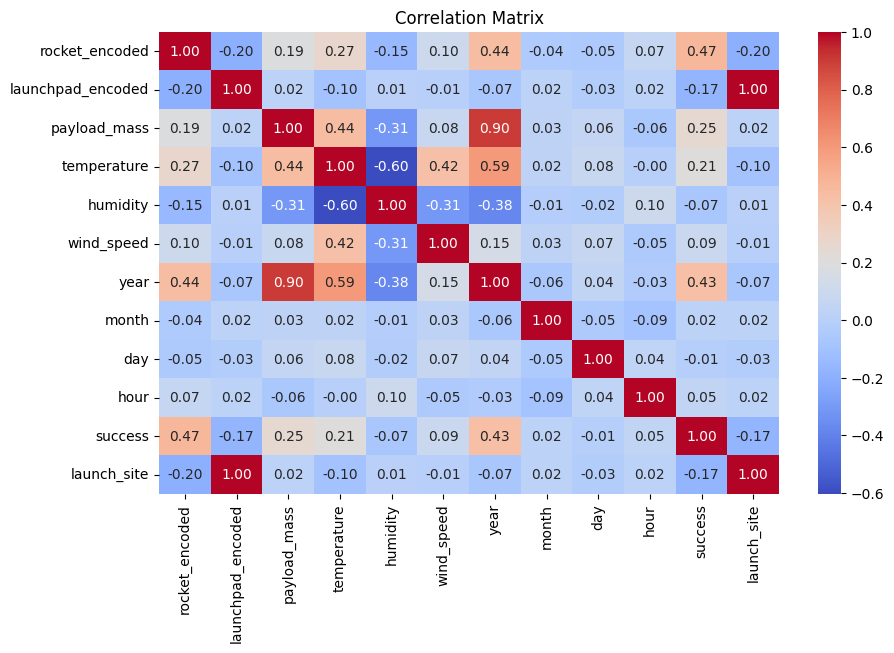

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **Machine Learning Model Implementation**

####  Step 1: Import Libraries & Load Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
import joblib
import os

In [26]:
# Ensure model directory exists
os.makedirs("models", exist_ok=True)

In [27]:
# Load the dataset
df = pd.read_csv("processed_spacex_data.csv")

In [28]:
# Select features and target
features = ['rocket_encoded', 'launchpad_encoded', 'payload_mass', 'temperature',
       'humidity', 'wind_speed', 'year', 'month', 'day', 'hour']
target = 'success'

In [29]:
# Drop rows with missing feature values
df = df.dropna(subset=features + [target])

#### Step 2: Train/Test Split

In [30]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#### Step 3: Logistic Regression (Baseline)

In [31]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.96      0.96      0.96        54

    accuracy                           0.93        56
   macro avg       0.48      0.48      0.48        56
weighted avg       0.93      0.93      0.93        56



#### Step 4: Decision Tree Classifier (with GridSearchCV)

In [32]:
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1')
grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))


c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Classification Report:

              precision    recall  f1-score   support

       False       0.50      0.50      0.50         2
        True       0.98      0.98      0.98        54

    accuracy                           0.96        56
   macro avg       0.74      0.74      0.74        56
weighted avg       0.96      0.96      0.96        56



### Step 5: Evaluate a classification model

In [34]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print("Model Evaluation Metrics:")
print(f"Accuracy Score : {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score   : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")

Model Evaluation Metrics:
Accuracy Score : 0.9286
Precision Score: 0.9630
Recall Score   : 0.9630
F1 Score       : 0.9630


In [35]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log, target_names=["Failed", "Success"]))


Classification Report:
              precision    recall  f1-score   support

      Failed       0.00      0.00      0.00         2
     Success       0.96      0.96      0.96        54

    accuracy                           0.93        56
   macro avg       0.48      0.48      0.48        56
weighted avg       0.93      0.93      0.93        56



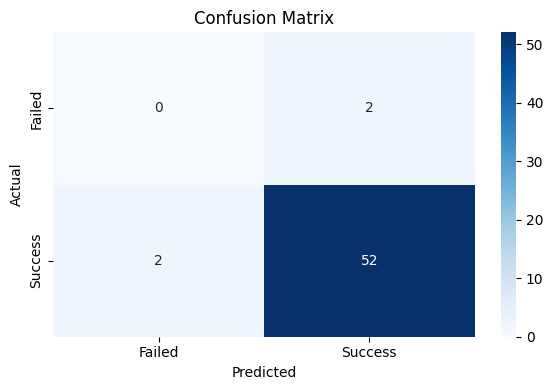

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Failed", "Success"], yticklabels=["Failed", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

### Step 6: Random Forest Classifier

In [38]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Save best model
joblib.dump(grid_rf.best_estimator_, "models/launch_success.pkl")


c:\Users\zafir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Classification Report:

              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.98      1.00      0.99        54

    accuracy                           0.98        56
   macro avg       0.99      0.75      0.83        56
weighted avg       0.98      0.98      0.98        56



['models/launch_success.pkl']

#### Step 7: ROC Curve & AUC

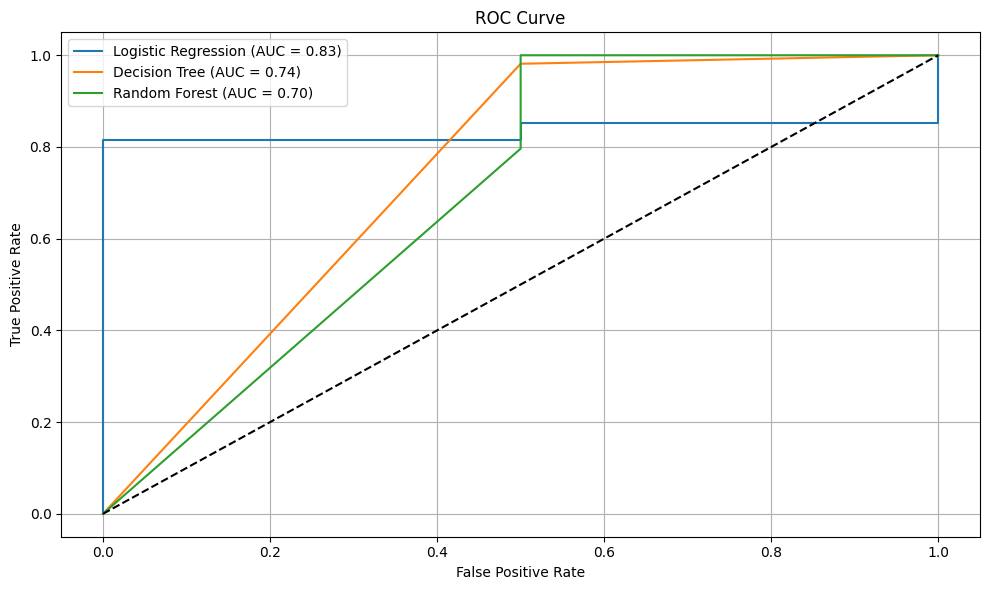

In [39]:
from sklearn.metrics import roc_auc_score

models = {
    "Logistic Regression": (logreg, y_pred_log),
    "Decision Tree": (grid_dt.best_estimator_, y_pred_dt),
    "Random Forest": (grid_rf.best_estimator_, y_pred_rf)
}

plt.figure(figsize=(10, 6))
for name, (model, _) in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("figures/roc_curve.png")
plt.show()

#### Step 8: Feature Importance

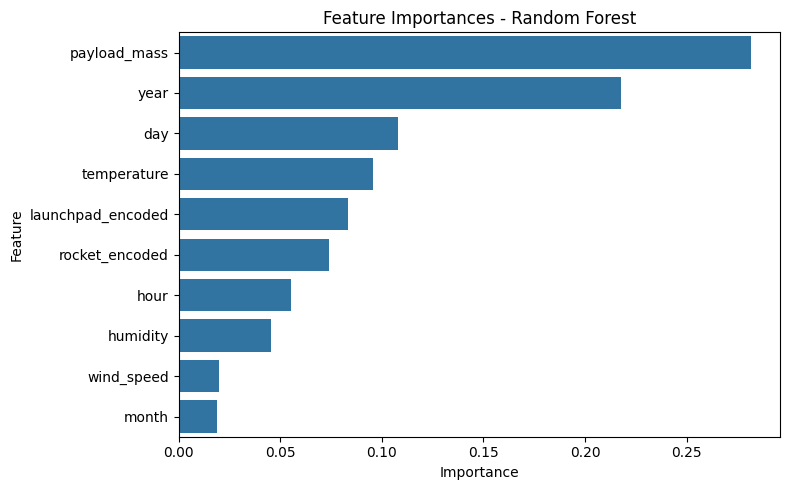

In [40]:
importances = grid_rf.best_estimator_.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.savefig("figures/feature_importance.png")
plt.show()